Populating the interactive namespace from numpy and matplotlib


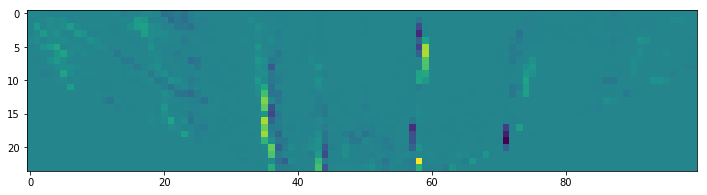

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pipeline as p
import patches


plt.interactive(True)

img1 = mpimg.imread("./test_images/vid1/225.jpg")
img2 = mpimg.imread("./test_images/vid1/227.jpg")
    
warped1, sure1 = p.get_birdView(p.undistort(img1))
edges1 = p.get_lines(sure1)

warped2, sure2 = p.get_birdView(p.undistort(img2))
edges2 = p.get_lines(sure2)

r1 = patches.rebin(edges1, (edges1.shape[0] // 4, edges1.shape[1] // 4))
r2 = patches.rebin(edges2, (edges2.shape[0] // 4, edges2.shape[1] // 4))


plt.imshow(r2.astype(float)-r1.astype(float))
plt.show()

#h1 = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)[:,:,2]
#h2 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)[:,:,2]

#plt.imshow(h1-h2, cmap='gray')

In [9]:
u = p.undistort( mpimg.imread("./test_images/test1.jpg"))

mpimg.imsave("./examples/undistort_test1.jpg", u)

In [19]:
u = p.undistort( mpimg.imread("./test_images/straight_lines1.jpg"))
    
warped, sure = p.get_birdView(u)
#edges1 = p.get_lines(sure1)

u = cv2.addWeighted(warped, 1.0,  p.genereate_straight_lanes(warped), 1.0, 0) 

edges = p.get_lines(warped)

mpimg.imsave("./examples/edges.png", edges)